In [42]:
import cv2 as cv
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt

def apply_canny_edge_detection(frame, upper_thresh=200, lower_thresh=100):
    grayscale = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    blurred = cv.GaussianBlur(grayscale, (5, 5), 0)
    edges = cv.Canny(blurred, lower_thresh, upper_thresh)

    ker_size = 3
    kernel = np.ones((ker_size,ker_size))
    closed = cv.dilate(edges, kernel)
    
    return closed

def region_of_interest(img):
    imshape = img.shape
    width =imshape[1]
    height = imshape[0]
    region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),]
    vertices=np.array([region_of_interest_vertices], np.int32)
    mask = np.zeros_like(img)
    cv.fillPoly(mask, vertices,255)
    masked_image = cv.bitwise_and(img, mask)
    return masked_image
    
def draw_lane_lines(frame, lanes_left, lanes_right):
    lane_visualization = np.zeros_like(frame)
    for lane in lanes_left + lanes_right:
        x1, y1, x2, y2 = lane
        cv.line(lane_visualization, (x1, y1), (x2, y2), (0, 255, 0), 5)
    return lane_visualization

def debug_draw(frame, lanes):
    lane_visualization = np.zeros_like(frame)
    for lane in lanes:
        x1, y1, x2, y2 = lane
        cv.line(lane_visualization, (x1, y1), (x2, y2), (0, 255, 0), 5)
    return lane_visualization


def verify_lines(lanes, side):
    c = 20
    AGC_verifed_lanes = []
    list1=[]
    list2=[]
    list3=[]
    list4=[]
    if side == 'l':
        lower_bound = -90
        upper_bound = -45 + c
    elif side == 'r':
        lower_bound = 45 - c
        upper_bound = 90

    for [x1, y1, x2, y2] in lanes:
        fit = np.polyfit((x1, x2), (y1, y2), 1)
        slope = math.degrees(fit[0])       
        if lower_bound <= slope and slope <= upper_bound:
            list1.append(x1)
            list2.append(y1)
            list3.append(x2)
            list4.append(y2)
            AGC_verifed_lanes.append([x1, y1, x2, y2])
    if len(list1)!=0:
        AGC_verifed_lanes=[]
        AGC_verifed_lanes.append([round(np.median(list1)), round(np.median(list2)), round(np.median(list3)), round(np.median(list4))])
    return AGC_verifed_lanes

def split_lanes(width, hough_lines):
    left_lanes = []
    right_lanes = []

    for detec_line in hough_lines:
        x1, y1, x2, y2 = detec_line.reshape(4)        
        if (x1 + x2)/2 > width/2:
            right_lanes.append([x1, y1, x2, y2])
        else:
            left_lanes.append([x1, y1, x2, y2])

    return left_lanes, right_lanes

In [47]:
video_capture = cv.VideoCapture(r"data\video\video3.mp4")
while video_capture.isOpened():
    successful_frame_read, frame = video_capture.read()
    if not successful_frame_read:
        break

    # Getting the edge image and defining roi
    canny_edges = apply_canny_edge_detection(frame)
    roi_frame = region_of_interest(canny_edges)
    cv.imshow("canny", roi_frame)
    
    # Getting the hough lines from the image
    hough_lines = cv.HoughLinesP(roi_frame, 2, np.pi /60, 160, np.array([]), minLineLength=50, maxLineGap=25)
    dim = np.shape(frame)
    
    # Splitting the left and right lanes
    lanes_left, lanes_right = split_lanes(dim[1], hough_lines)

    # Filtering the lines using AGC
    lanes_left = verify_lines(lanes_left, "l")
    lanes_right = verify_lines(lanes_right, "r")
    
    lane_lines_image = draw_lane_lines(frame, lanes_left, lanes_right)
    
    combined_output = cv.addWeighted(frame, 0.9, lane_lines_image, 1, 1)

    cv.imshow("Lane Lines", combined_output)

    # Debug block, pay no heed
    left_lane_image = debug_draw(frame, lanes_left)
    right_lane_image = debug_draw(frame, lanes_right)

    debug_line = lane_lines_image + canny_edges.reshape(dim[0],dim[1],1)

    combined_output_left = cv.addWeighted(frame, 0.9, left_lane_image, 1, 1)
    combined_output_right = cv.addWeighted(frame, 0.9, right_lane_image, 1, 1)

    # cv.imshow("Left", combined_output_left)
    # cv.imshow("Right", combined_output_right)

    if cv.waitKey(10) & 0xFF == ord('q'):
        video_capture.release()
        cv.destroyAllWindows()
        break



C:\Users\occim\AppData\Local\Temp\ipykernel_111244\889748899.py:62: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit((x1, x2), (y1, y2), 1)
C:\Users\occim\AppData\Local\Temp\ipykernel_111244\889748899.py:62: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit((x1, x2), (y1, y2), 1)
C:\Users\occim\AppData\Local\Temp\ipykernel_111244\889748899.py:62: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit((x1, x2), (y1, y2), 1)
C:\Users\occim\AppData\Local\Temp\ipykernel_111244\889748899.py:62: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit((x1, x2), (y1, y2), 1)
C:\Users\occim\AppData\Local\Temp\ipykernel_111244\889748899.py:62: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit((x1, x2), (y1, y2), 1)
C:\Users\occim\AppData\Local\Temp\ipykernel_111244\889748899.py:62: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit((x1, x2), (y1, y2), 1)
C:\Users\occim\AppData\Local\Temp\ipykernel_111244\8897488

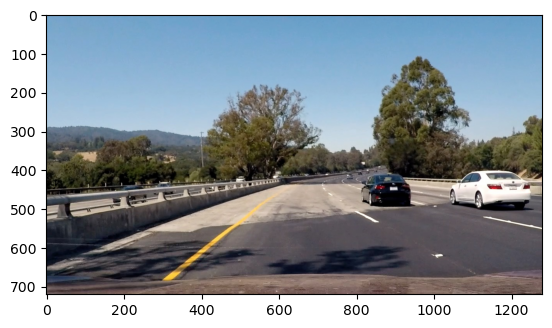

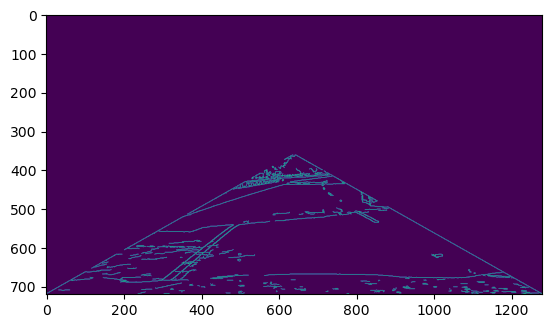

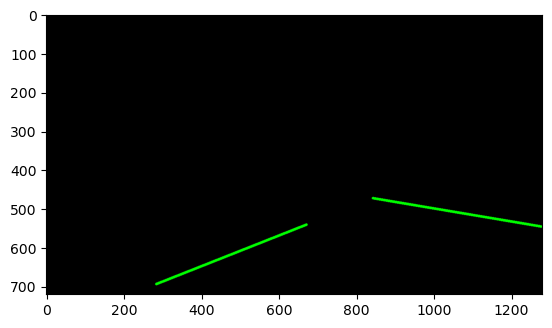

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
def region_of_interest(img):
    imshape = image.shape
    width =imshape[1]
    height = imshape[0]
    vertices = np.array([[
    (0, height),
    (width / 2, height / 2),
    (width, height),
]], dtype=np.int32)
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
image = mpimg.imread('test_images\Test4.jpg')
cropped_image = region_of_interest(image)
# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)

# Getting the hough lines from the image
hough_lines = cv.HoughLinesP(cannyed_image, 2, np.pi /60, 100, np.array([]), minLineLength=100, maxLineGap=100)
dim = np.shape(frame)

# Splitting the left and right lanes
lanes_left, lanes_right = split_lanes(dim[1], hough_lines)

# Filtering the lines using AGC
lanes_left = verify_lines(lanes_left, "l")
lanes_right = verify_lines(lanes_right, "r")

lane_lines_image = draw_lane_lines(frame, lanes_left, lanes_right)

combined_output = cv.addWeighted(frame, 0.9, lane_lines_image, 1, 1)

plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(cannyed_image)
plt.figure()
plt.imshow(lane_lines_image)

In [51]:

    
img = cv.imread('test_images\Test1.jpg')
canny_edges=apply_canny_edge_detection(img)

# Getting the edge image and defining roi
roi_frame = define_region_of_interest(canny_edges)
cv.imshow("canny", roi_frame)

# Getting the hough lines from the image
hough_lines = cv.HoughLinesP(roi_frame, 2, np.pi / 180, 100, np.array([]), minLineLength=100, maxLineGap=150)
dim = np.shape(frame)

# Splitting the left and right lanes
lanes_left, lanes_right = split_lanes(dim[1], hough_lines)

# Filtering the lines using AGC
lanes_left = verify_lines(lanes_left, "l")
lanes_right = verify_lines(lanes_right, "r")

lane_lines_image = draw_lane_lines(frame, lanes_left, lanes_right)

combined_output = cv.addWeighted(frame, 0.9, lane_lines_image, 1, 1)

cv.imshow("Lane Lines", combined_output)

cv.waitKey(0) 
  
# closing all open windows 
cv.destroyAllWindows() 